In [2]:
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
action_set = np.loadtxt('action_set.csv', delimiter=',')
reward_set = np.loadtxt('reward_set.csv', delimiter=',')

In [4]:
pre_action0 = []
pre_action1 = []
post_action0 = []
post_action1 = []
for i in range(len(action_set)):
    unrewarded_odor0 = np.arange(200)[np.logical_and(action_set[i] == 0, reward_set[i] == 0)]
    unrewarded_odor1 = np.arange(200)[np.logical_and(action_set[i] == 1, reward_set[i] == 0)]
    unrewarded_odor0 = unrewarded_odor0[np.logical_and(unrewarded_odor0 > 0, unrewarded_odor0 < 199)]
    unrewarded_odor1 = unrewarded_odor1[np.logical_and(unrewarded_odor1 > 0, unrewarded_odor1 < 199)]
    pre_action0.append(action_set[i][unrewarded_odor0-1])
    pre_action1.append(action_set[i][unrewarded_odor1-1])
    post_action0.append(action_set[i][unrewarded_odor0+1])
    post_action1.append(action_set[i][unrewarded_odor1+1])

In [5]:
print(np.mean(np.concatenate(post_action0)-np.concatenate(pre_action0)))
print(np.mean(np.concatenate(post_action1)-np.concatenate(pre_action1)))

0.023557126030624265
-0.022222222222222223


In [6]:
print(np.mean(np.concatenate(post_action0))-np.mean(np.concatenate(pre_action0)))
print(np.mean(np.concatenate(post_action1))-np.mean(np.concatenate(pre_action1)))

0.023557126030624265
-0.022222222222222254


In [8]:
pre_action0 = []
pre_action1 = []
post_action0 = []
post_action1 = []
for i in range(len(action_set)):
    rewarded_odor0 = np.arange(200)[np.logical_and(action_set[i] == 0, reward_set[i] == 1)]
    rewarded_odor1 = np.arange(200)[np.logical_and(action_set[i] == 1, reward_set[i] == 1)]
    rewarded_odor0 = rewarded_odor0[np.logical_and(rewarded_odor0 > 0, rewarded_odor0 < 199)]
    rewarded_odor1 = rewarded_odor1[np.logical_and(rewarded_odor1 > 0, rewarded_odor1 < 199)]
    pre_action0.append(action_set[i][rewarded_odor0-1])
    pre_action1.append(action_set[i][rewarded_odor1-1])
    post_action0.append(action_set[i][rewarded_odor0+1])
    post_action1.append(action_set[i][rewarded_odor1+1])

In [9]:
print(np.mean(np.concatenate(post_action0)-np.concatenate(pre_action0)))
print(np.mean(np.concatenate(post_action1)-np.concatenate(pre_action1)))

-0.016052880075542966
0.01949317738791423


In [44]:
print(np.mean(np.concatenate(pre_action0))-np.mean(np.concatenate(post_action0)))
print(np.mean(np.concatenate(pre_action1))-np.mean(np.concatenate(post_action1)))

0.016052880075542952
-0.01949317738791423


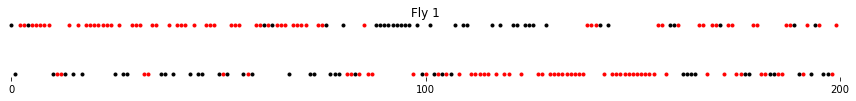

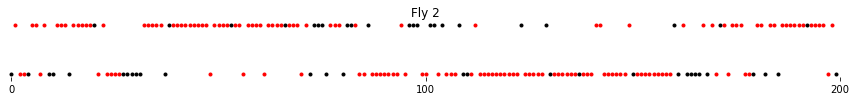

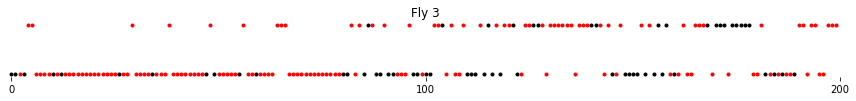

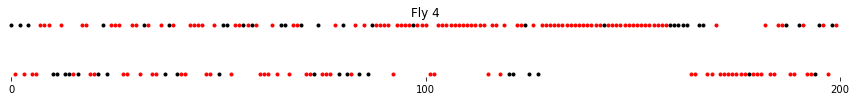

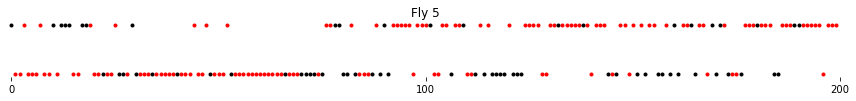

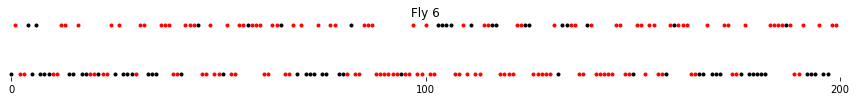

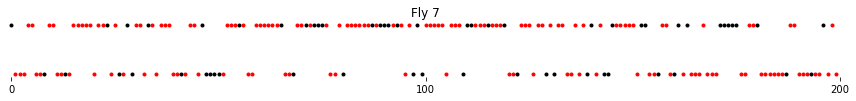

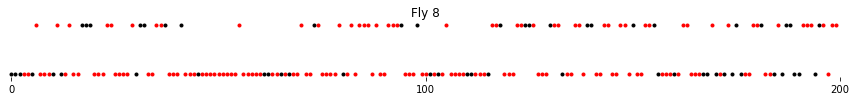

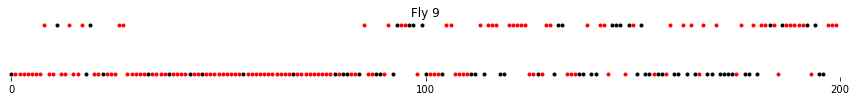

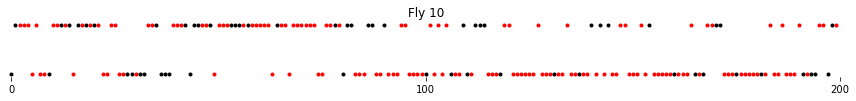

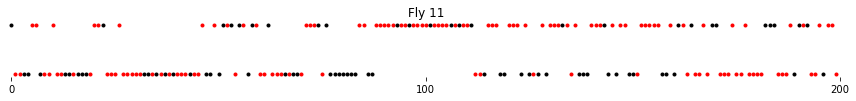

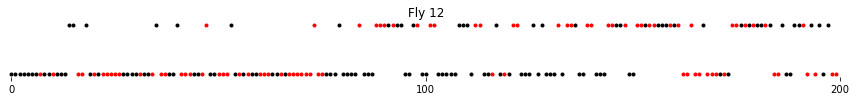

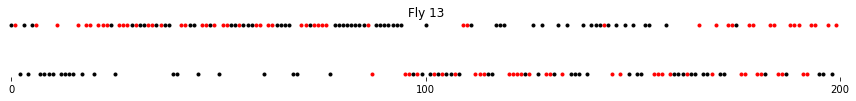

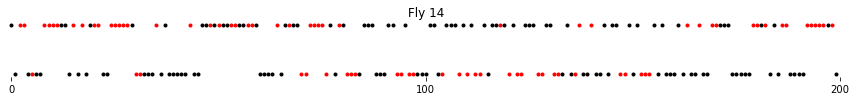

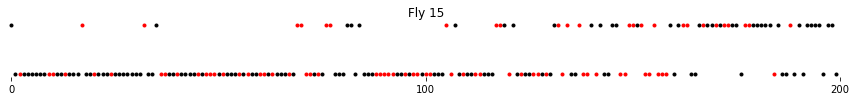

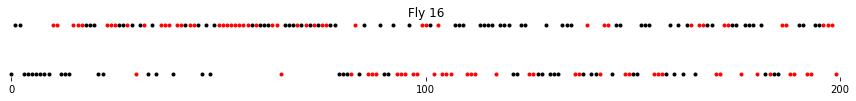

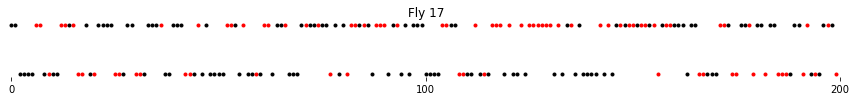

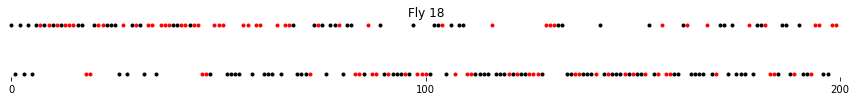

In [3]:
for t in range(len(action_set)):
    plt.figure(figsize=(15, 1))
    for i in range(200):
        if reward_set[t, i] == 1:
            plt.plot(i, action_set[t, i], 'r.')
        else:
            plt.plot(i, action_set[t, i], 'k.')
    plt.box(False)
    plt.yticks([])
    plt.xticks([0,100,200])
    plt.xlim([-1,201])
    plt.title('Fly {}'.format(t+1))
    plt.show()
    print('\n')

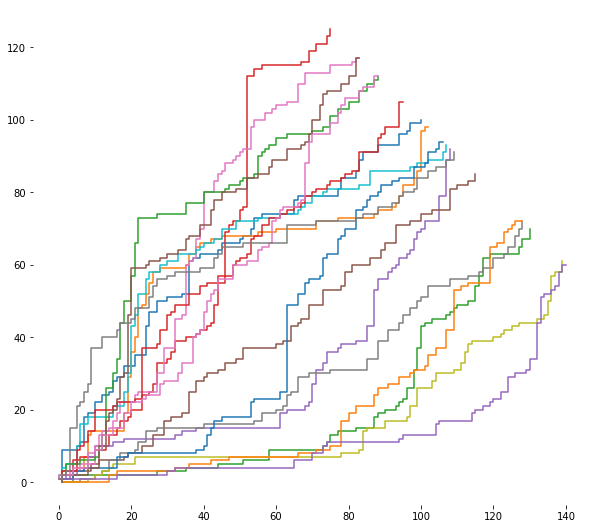

In [24]:
plt.figure(figsize=(10,10))
for fly in range(len(action_set)):
    plt.plot(np.cumsum(action_set[fly, :]==0),np.cumsum(action_set[fly, :]==1))
plt.gca().set_aspect('equal', adjustable='box')
plt.box(False)

In [9]:
np.cumsum(action_set[0, :]==0)

(200,)

In [166]:
# We define exploration rate as deviation from cumulative reward probability
exploration_data = pd.DataFrame(columns=['Fly Number','History Length', 'Greedy Exploration Rate', 'Confidence Weighted Exploration Rate'])

for fly in tqdm(range(len(action_set))):
    for history_window in [2,5,10,15,20,50,100,200]:
        #plt.figure(figsize=(15, 1))
        greedy_explore_count = 0
        confidence_weighted_explore_count = 0
        for trial in range(1,len(action_set[fly])):
            action_sample = action_set[fly, np.max([0, trial-history_window]):trial]
            reward_sample = reward_set[fly, np.max([0, trial-history_window]):trial]
            actual_action = action_set[fly, trial]

            if np.sum(action_sample==0) > 0:
                cumulative_reward_probability_for_action_0 = np.sum(reward_sample[action_sample == 0]) / len(action_sample) #/ np.sum(action_sample == 0)
            else:
                cumulative_reward_probability_for_action_0 = 0
            if np.sum(action_sample==1) > 0:
                cumulative_reward_probability_for_action_1 = np.sum(reward_sample[action_sample == 1]) / len(action_sample) #/ np.sum(action_sample == 1)
            else:
                cumulative_reward_probability_for_action_1 = 0

            #plt.plot(trial, cumulative_reward_probability_for_action_0, 'k.')
            #plt.plot(trial, cumulative_reward_probability_for_action_1, 'r.')

            predicted_action = np.argmax([cumulative_reward_probability_for_action_0, cumulative_reward_probability_for_action_1])
            # actual_action = action_sample[-1]

            if predicted_action != actual_action:
                #plt.axvline(trial, color='k')
                greedy_explore_count += 1
                confidence_weighted_explore_count += abs(cumulative_reward_probability_for_action_0 - cumulative_reward_probability_for_action_1)
        #plt.box(False)
        greedy_explore_rate = greedy_explore_count / len(action_set[fly])
        confidence_weighted_explore_rate = confidence_weighted_explore_count / len(action_set[fly])
        
        exploration_data.loc[exploration_data.shape[0]] = [fly+1, history_window, greedy_explore_rate, confidence_weighted_explore_rate]

  0%|          | 0/18 [00:00<?, ?it/s]

In [167]:
exploration_data.head()

,Fly Number,History Length,Greedy Exploration Rate,Confidence Weighted Exploration Rate
0,1.0,2.0,0.430,0.202500
1,1.0,5.0,0.415,0.166000
2,1.0,10.0,0.410,0.173000
3,1.0,15.0,0.430,0.169438
4,1.0,20.0,0.450,0.158164


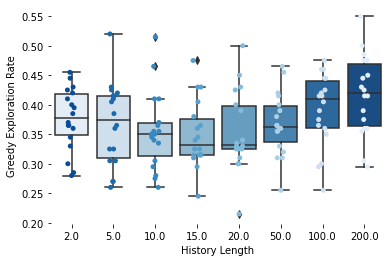

In [168]:
sns.boxplot(x='History Length', y='Greedy Exploration Rate', data=exploration_data, palette='Blues')
sns.stripplot(x='History Length', y='Greedy Exploration Rate', data=exploration_data, jitter=True, palette='Blues_r')
plt.box(False)

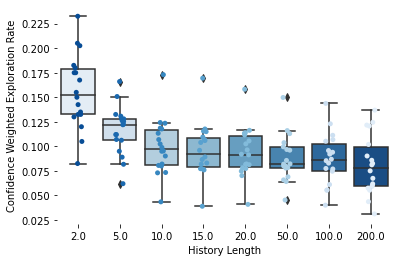

In [169]:
sns.boxplot(x='History Length', y='Confidence Weighted Exploration Rate', data=exploration_data, palette='Blues')
sns.stripplot(x='History Length', y='Confidence Weighted Exploration Rate', data=exploration_data, jitter=True, palette='Blues_r')
plt.box(False)

In [170]:
df = pd.DataFrame(columns=['epsilon','relative_value_difference','effect_size'])
for eps in np.arange(0,1.1,0.1):
    for rel_weight in [1,1.1,1.3,1.5,1.7,1.9,2]:
        p = np.array([(1-eps)/(1+rel_weight)+eps/2, (1-eps)*rel_weight/(1+rel_weight)+eps/2])
        sample = np.random.choice(2, p=p,size=(100,1000)).mean(axis=0)
        chance_sample = np.random.choice(2, size=(100,1000)).mean(axis=0)
        effect_size = (np.mean(sample) - np.mean(chance_sample))/np.std(np.concatenate([sample, chance_sample]))
        df.loc[df.shape[0]] = [eps, rel_weight, effect_size]

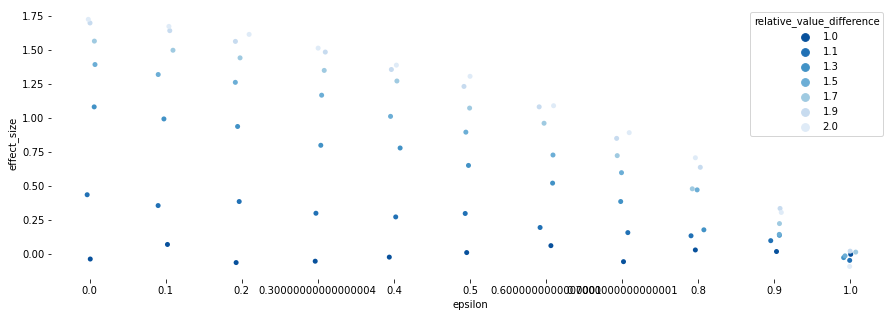

In [171]:
plt.figure(figsize=(15, 5))
sns.stripplot(x='epsilon', y='effect_size', data=df, jitter=True, palette='Blues_r', hue='relative_value_difference')
plt.box(False)


(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
         19., 105., 431., 284., 144.,  16.,   0.,   0.,   0.,   0.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05]),
 <BarContainer object of 21 artists>)

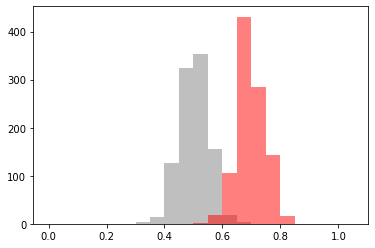

In [187]:
eps = 0.3
rel_weight = 100000
p = np.array([eps, 1-eps])
sample = np.random.choice(2, p=p,size=(100,1000)).mean(axis=0)
chance_sample = np.random.choice(2, size=(100,1000)).mean(axis=0)
effect_size = (np.mean(sample) - np.mean(chance_sample))/np.std(np.concatenate([sample, chance_sample]))
plt.hist(chance_sample,bins=np.arange(0,1.1,0.05), color='gray',alpha=0.5)
plt.hist(sample,bins=np.arange(0,1.1,0.05),color='red',alpha=0.5)


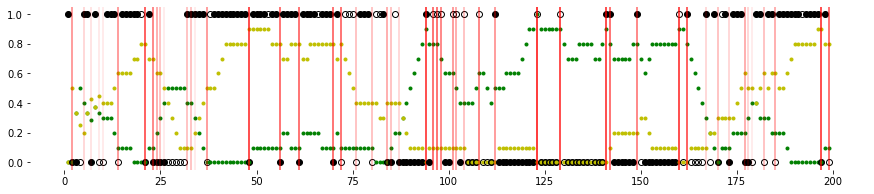

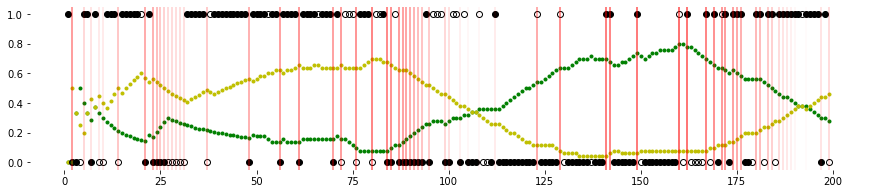

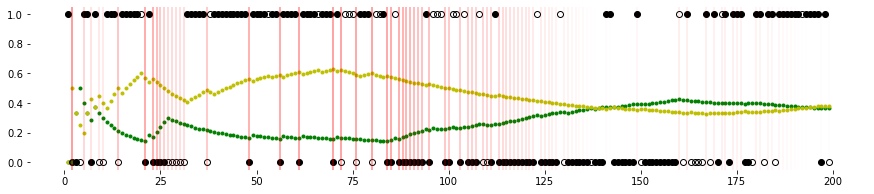

In [176]:
# We define exploration rate as deviation from cumulative reward probability
exploration_data = pd.DataFrame(columns=['Fly Number','History Length', 'Greedy Exploration Rate', 'Confidence Weighted Exploration Rate'])

for fly in [1]:
    for history_window in [10,50,200]:
        plt.figure(figsize=(15, 3))
        greedy_explore_count = 0
        confidence_weighted_explore_count = 0
        for trial in range(1,len(action_set[fly])):
            action_sample = action_set[fly, np.max([0, trial-history_window]):trial]
            reward_sample = reward_set[fly, np.max([0, trial-history_window]):trial]
            actual_action = action_set[fly, trial]

            if np.sum(action_sample==0) > 0:
                cumulative_reward_probability_for_action_0 = np.sum(reward_sample[action_sample == 0]) / len(action_sample) #/ np.sum(action_sample == 0)
            else:
                cumulative_reward_probability_for_action_0 = 0
            if np.sum(action_sample==1) > 0:
                cumulative_reward_probability_for_action_1 = np.sum(reward_sample[action_sample == 1]) / len(action_sample) #/ np.sum(action_sample == 1)
            else:
                cumulative_reward_probability_for_action_1 = 0

            if reward_set[fly, trial] == 0:
                plt.plot(trial, actual_action, 'ko', markerfacecolor='None')
            else:
                plt.plot(trial, actual_action, 'ko')
            plt.plot(trial, cumulative_reward_probability_for_action_0, 'g.')
            plt.plot(trial, cumulative_reward_probability_for_action_1, 'y.')
            # plt.plot(trial, cumulative_reward_probability_for_action_0/(cumulative_reward_probability_for_action_0+cumulative_reward_probability_for_action_1),'g.')

            predicted_action = np.argmax([cumulative_reward_probability_for_action_0, cumulative_reward_probability_for_action_1])
            # actual_action = action_sample[-1]

            if predicted_action != actual_action:
                plt.axvline(trial, color='red', alpha=abs(cumulative_reward_probability_for_action_0 - cumulative_reward_probability_for_action_1))
                greedy_explore_count += 1
                confidence_weighted_explore_count += abs(cumulative_reward_probability_for_action_0 - cumulative_reward_probability_for_action_1)
        plt.box(False)
        greedy_explore_rate = greedy_explore_count / len(action_set[fly])
        confidence_weighted_explore_rate = confidence_weighted_explore_count / len(action_set[fly])
        
        exploration_data.loc[exploration_data.shape[0]] = [fly+1, history_window, greedy_explore_rate, confidence_weighted_explore_rate]